# Marks Prediction Using Simple Linear Regression
**Importing Libraries**

In [2]:
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt  
%matplotlib inline

#### Reading Dataset

In [99]:
df = pd.read_excel('Dataset.xlsx')

In [100]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting Hours and Scores on a Scatter Plot to check the distribution

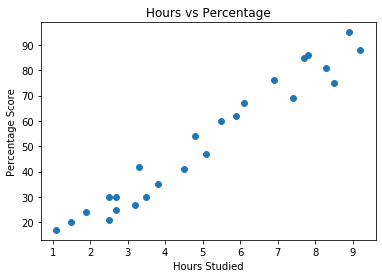

In [22]:
df.plot.scatter(x='Hours', y='Scores', s=35)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

#### Assigning Hours to X and Scores to y and Performing Train-Test Split

In [126]:
X = df.iloc[:,:-1] 
y = df.iloc[:,1]

In [141]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

#### Training the Algorithm

In [142]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Plotting Test Data using the Trained Dataset

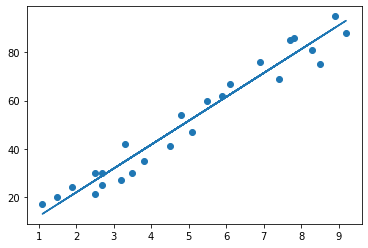

In [143]:
line = regressor.coef_*X+regressor.intercept_ 
plt.scatter(X, y)  
plt.plot(X, line)
plt.show()

In [144]:
y_pred = regressor.predict(X_test)

In [145]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Comparing Actual vs Predicted Values

In [146]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [147]:
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [155]:
hours = [[9.25]]  
our_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(our_pred[0]))

Number of hours = [[9.25]]
Prediction Score = 93.69173248737538


####  Evaluating the performance of algorithm

In [154]:
from sklearn import metrics
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
